#Exploring and Cleaning the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_ps4 = pd.read_csv('PS4_GamesSales.csv', encoding = 'iso-8859-1')
data_ps4.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
data_xbox = pd.read_csv('XboxOne_GameSales.csv', encoding = 'iso-8859-1')
data_xbox.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [4]:
data_ps4.insert(0, 'Game_ID', range(len(data_ps4)))

In [5]:
data_ps4 = data_ps4.set_index('Game_ID')
data_ps4.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Game_ID,,,,,,,,,
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


Game IDs are added for each unique title

In [6]:
game_ids = list()

for i, game_name in enumerate(data_xbox['Game']):
  if data_ps4['Game'].str.contains(game_name).any():
    game_id = data_ps4.query('Game == "%s"' % game_name).index

    if len(game_id) == 0:
      game_id = len(data_ps4) + i + 1
    else:
      game_id = game_id[0]

  else:
    game_id = len(data_ps4) + i + 1

  game_ids.append(game_id)

<ipython-input-6-85306deb7aff>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if data_ps4['Game'].str.contains(game_name).any():


In [7]:
data_xbox.insert(0, 'Game_ID', game_ids)

In [8]:
data_xbox = data_xbox.set_index('Game_ID')
data_xbox = data_xbox.drop('Pos', axis=1)
data_xbox.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Game_ID,,,,,,,,,
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
15,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [9]:
data_all = data_ps4.join(data_xbox[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']], how = 'inner', rsuffix='_xbox', lsuffix = '_ps4')

In [10]:
data_all['Global'] = data_all['Global_ps4'] + data_all['Global_xbox']

In [11]:
data_all.isnull().sum()

Game                   0
Year                  58
Genre                  0
Publisher             58
North America_ps4      0
Europe_ps4             0
Japan_ps4              0
Rest of World_ps4      0
Global_ps4             0
North America_xbox     0
Europe_xbox            0
Japan_xbox             0
Rest of World_xbox     0
Global_xbox            0
Global                 0
dtype: int64

In [12]:
data_all = data_all.drop(['Publisher'], axis = 1)
data_all = data_all.fillna(method='ffill')

In [13]:
print(data_all.isnull().sum())
data_all.head()

Game                  0
Year                  0
Genre                 0
North America_ps4     0
Europe_ps4            0
Japan_ps4             0
Rest of World_ps4     0
Global_ps4            0
North America_xbox    0
Europe_xbox           0
Japan_xbox            0
Rest of World_xbox    0
Global_xbox           0
Global                0
dtype: int64


,Game,Year,Genre,North America_ps4,Europe_ps4,Japan_ps4,Rest of World_ps4,Global_ps4,North America_xbox,Europe_xbox,Japan_xbox,Rest of World_xbox,Global_xbox,Global
Game_ID,,,,,,,,,,,,,,
0,Grand Theft Auto V,2014.0,Action,6.06,9.71,0.60,3.02,19.39,4.70,3.25,0.01,0.76,8.72,28.11
1,Call of Duty: Black Ops 3,2015.0,Shooter,6.18,6.05,0.41,2.44,15.09,4.63,2.04,0.02,0.68,7.37,22.46
2,Red Dead Redemption 2,2018.0,Action-Adventure,5.26,6.21,0.21,2.26,13.94,3.76,1.47,0.00,0.54,5.77,19.71
3,Call of Duty: WWII,2017.0,Shooter,4.67,6.21,0.40,2.12,13.40,3.75,1.91,0.00,0.57,6.23,19.63
4,FIFA 18,2017.0,Sports,1.27,8.64,0.15,1.73,11.80,0.98,1.92,0.00,0.23,3.14,14.94


In [14]:
data_all = data_all.rename(columns={'Global': 'Global_Total'})

In [15]:
data_all['Year'] = data_all['Year'].astype(int)

In [16]:
data_all= data_all.drop_duplicates()

In [17]:
data_all

,Game,Year,Genre,North America_ps4,Europe_ps4,Japan_ps4,Rest of World_ps4,Global_ps4,North America_xbox,Europe_xbox,Japan_xbox,Rest of World_xbox,Global_xbox,Global_Total
Game_ID,,,,,,,,,,,,,,
0,Grand Theft Auto V,2014,Action,6.06,9.71,0.60,3.02,19.39,4.70,3.25,0.01,0.76,8.72,28.11
1,Call of Duty: Black Ops 3,2015,Shooter,6.18,6.05,0.41,2.44,15.09,4.63,2.04,0.02,0.68,7.37,22.46
2,Red Dead Redemption 2,2018,Action-Adventure,5.26,6.21,0.21,2.26,13.94,3.76,1.47,0.00,0.54,5.77,19.71
3,Call of Duty: WWII,2017,Shooter,4.67,6.21,0.40,2.12,13.40,3.75,1.91,0.00,0.57,6.23,19.63
4,FIFA 18,2017,Sports,1.27,8.64,0.15,1.73,11.80,0.98,1.92,0.00,0.23,3.14,14.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Moons Of Madness,2017,Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1023,Iron Harvest,2018,Strategy,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1024,Biomutant,2018,Action,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Analysis on PS4 vs XBox One Game Sales

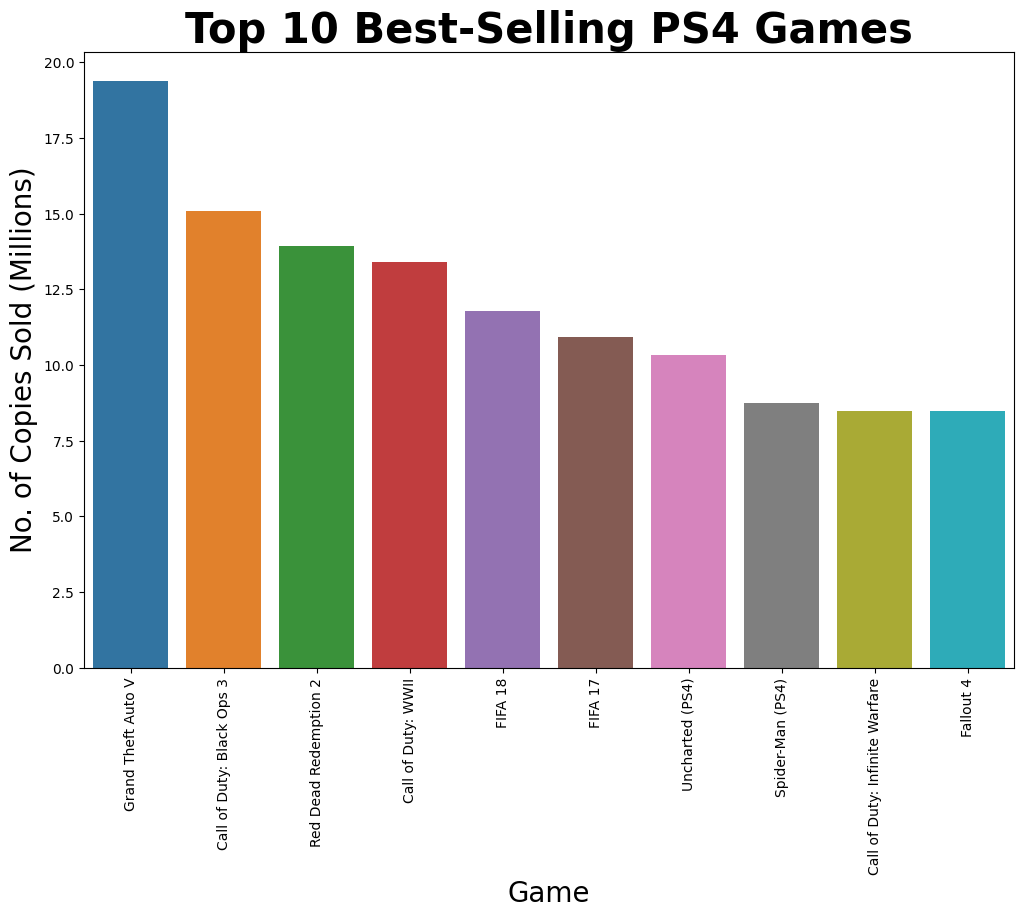

In [18]:
ax = sns.barplot(x = 'Game', y = "Global", data = data_ps4[:10])
ax.figure.set_size_inches(12, 8)

ax.set_title("Top 10 Best-Selling PS4 Games", fontweight="bold", fontsize = 30)
ax.set_xlabel('Game', fontsize = 20)
ax.set_ylabel('No. of Copies Sold (Millions)', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

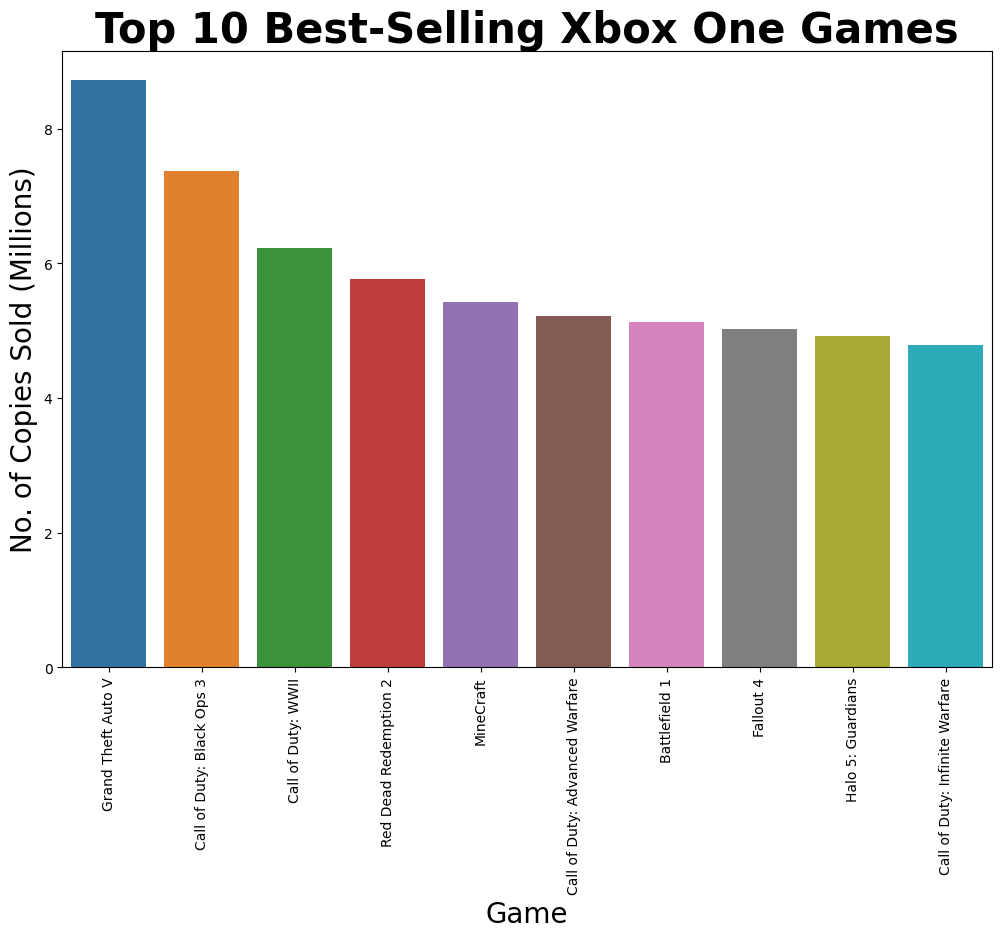

In [19]:
ax = sns.barplot(x = 'Game', y = "Global", data = data_xbox[:10])
ax.figure.set_size_inches(12, 8)

ax.set_title("Top 10 Best-Selling Xbox One Games", fontweight="bold", fontsize = 30)
ax.set_xlabel('Game', fontsize = 20)
ax.set_ylabel('No. of Copies Sold (Millions)', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [20]:
most_sold = data_all.sort_values('Global_Total', ascending = False)

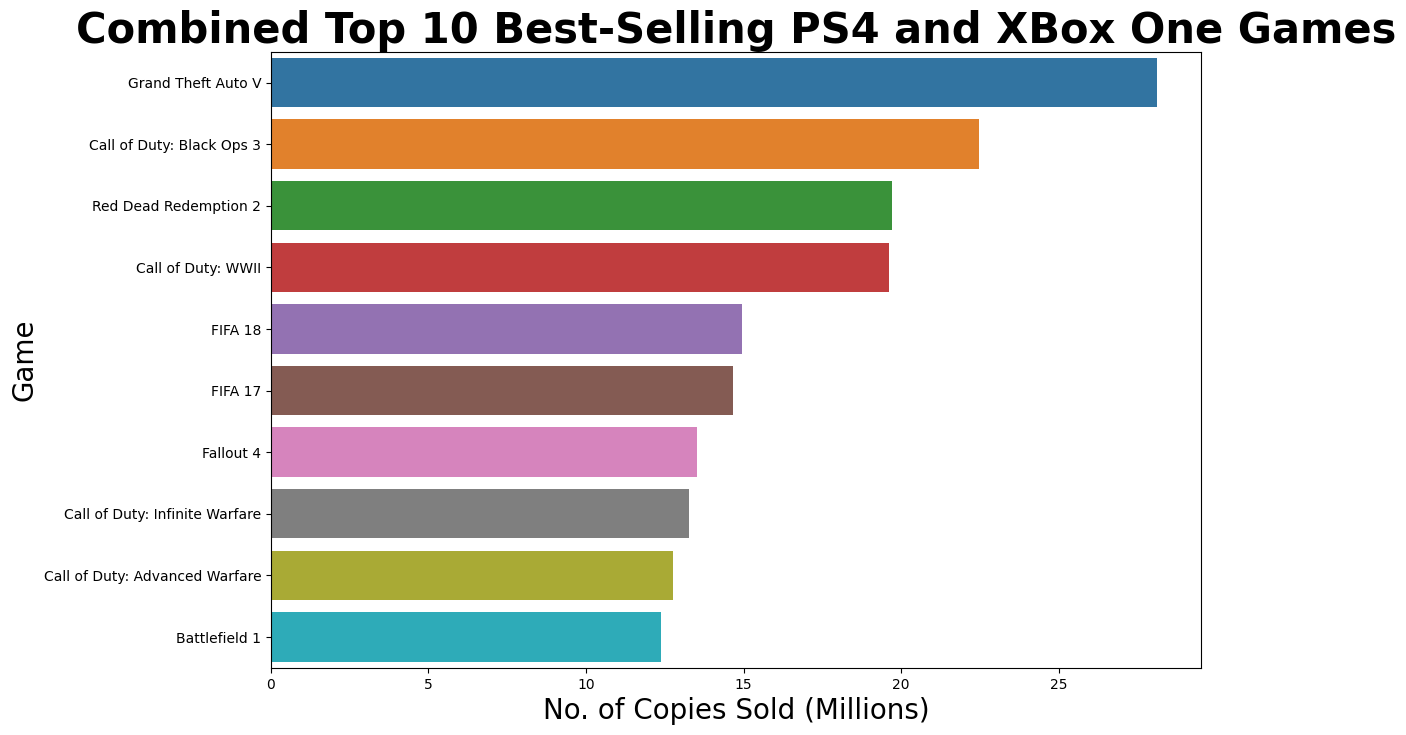

In [21]:
ax = sns.barplot(y = 'Game', x = "Global_Total", data = most_sold[:10])
ax.figure.set_size_inches(12, 8)

ax.set_title("Combined Top 10 Best-Selling PS4 and XBox One Games", fontweight="bold",fontsize = 30)
ax.set_xlabel('No. of Copies Sold (Millions)', fontsize = 20)
ax.set_ylabel('Game', fontsize = 20)

plt.show()

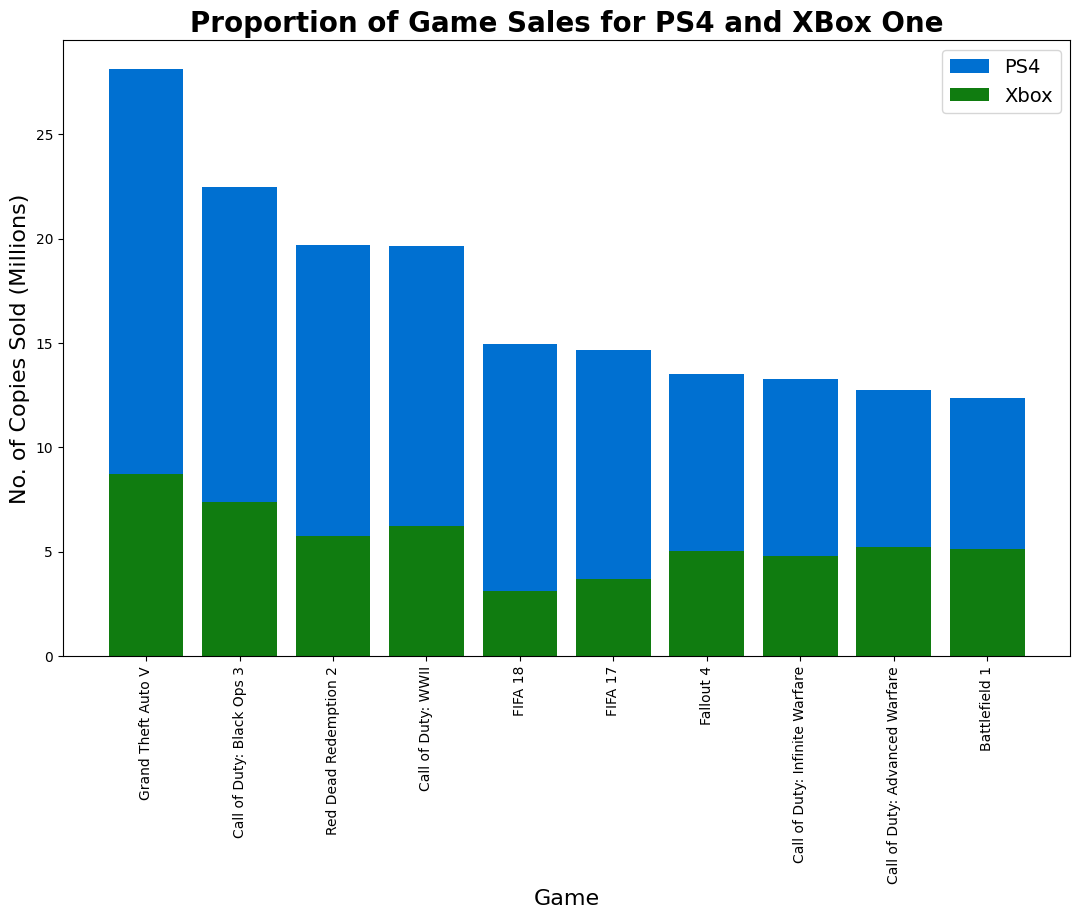

In [22]:
plt.rc('figure', figsize = (13, 8))

plt.bar(most_sold['Game'][:10], most_sold['Global_Total'][:10], color = '#0070D1')
plt.bar(most_sold['Game'][:10], most_sold['Global_xbox'][:10], color = '#107C10')

plt.title('Proportion of Game Sales for PS4 and XBox One', fontweight="bold", fontsize=20)
plt.xlabel('Game', fontsize = 16)
plt.ylabel('No. of Copies Sold (Millions)', fontsize = 16)
plt.legend(['PS4', 'Xbox'], fontsize = 14)
plt.xticks(rotation = 90, fontsize = 10)

plt.show()

In [23]:
all_games = pd.concat([data_ps4.reset_index(), data_xbox.reset_index()], ignore_index=True)

In [24]:
all_games = all_games.set_index('Game_ID')

In [25]:
all_games

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Game_ID,,,,,,,,,
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1024,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00


In [26]:
exclusive_xbox = all_games.drop(data_ps4.index, errors = 'ignore').sort_values('Global', ascending = False)
exclusive_ps4 = all_games.drop(data_xbox.index, errors = 'ignore').sort_values('Global', ascending = False)
exclusive_ps4 = exclusive_ps4.drop(11)
exclusive_xbox = exclusive_xbox.drop(1045)
exclusive_ps4['Console'] = ['PS4'] * len(exclusive_ps4)
exclusive_xbox['Console'] = ['Xbox'] * len(exclusive_xbox)

In [27]:
exclusive_xbox

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Console
Game_ID,,,,,,,,,,
1043,Halo 5: Guardians,2015.0,Shooter,Microsoft Studios,2.94,1.49,0.03,0.45,4.92,Xbox
1046,Forza Horizon 3,2016.0,Racing,Microsoft Studios,1.64,1.96,0.02,0.32,3.93,Xbox
1048,Gears of War: Ultimate Edition,2015.0,Shooter,Microsoft Studios,2.88,0.37,0.00,0.37,3.62,Xbox
1050,Halo: The Master Chief Collection,2014.0,Shooter,Microsoft Studios,2.06,1.04,0.03,0.31,3.44,Xbox
1052,Gears of War 4,2016.0,Shooter,Microsoft Studios,2.17,0.90,0.00,0.32,3.38,Xbox
...,...,...,...,...,...,...,...,...,...,...
1515,Powerstar Golf,NaN,Sports,NaN,0.00,0.00,0.00,0.00,0.00,Xbox
1517,Black Tusk Studios Game,2020.0,Misc,Microsoft Game Studios,0.00,0.00,0.00,0.00,0.00,Xbox
1525,Fable Legends,2019.0,Role-Playing,Microsoft Studios,0.00,0.00,0.00,0.00,0.00,Xbox


To find console-exclusive games, PS4 games were removed from all Xbox games to find XBox exclusives and vice versa.

In [28]:
best_exclusive = pd.concat([exclusive_ps4.head(), exclusive_xbox.head()])

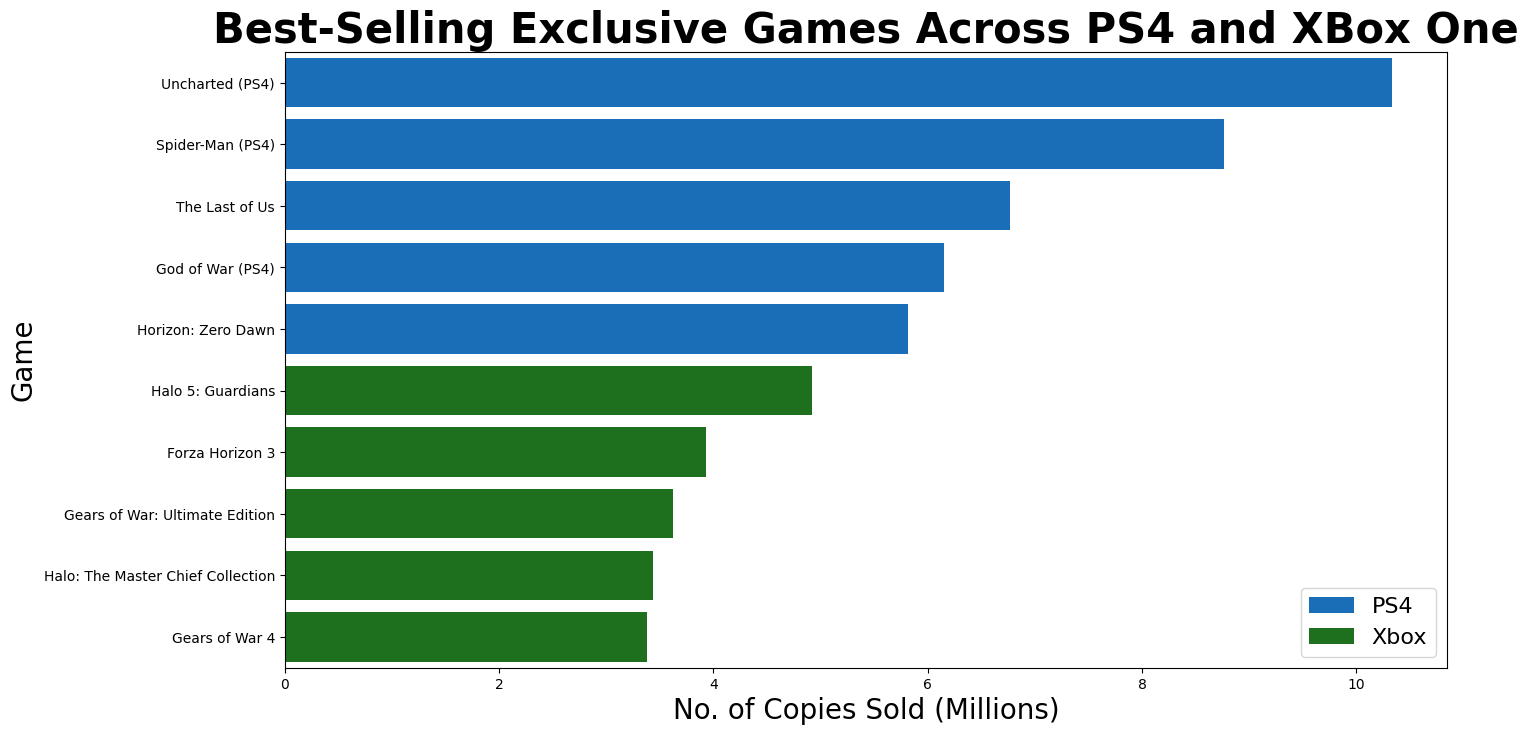

In [29]:
ax = sns.barplot(data = best_exclusive, y = 'Game', x = 'Global', hue = 'Console', palette = ['#0070D1','#107C10'], dodge=False)
ax.figure.set_size_inches(15, 8)

ax.set_title("Best-Selling Exclusive Games Across PS4 and XBox One", fontweight="bold", fontsize = 30)
ax.set_xlabel('No. of Copies Sold (Millions)', fontsize = 20)
ax.set_ylabel('Game', fontsize = 20)
plt.legend(fontsize = 16)

plt.show()

In [30]:
genre_exclusive_ps4 = exclusive_ps4.groupby('Genre').sum().sort_values('Global', ascending=False)
genre_exclusive_xbox = exclusive_xbox.groupby('Genre').sum().sort_values('Global', ascending=False)
genre_exclusive_ps4['Console'] = ['PS4'] * len(genre_exclusive_ps4)
genre_exclusive_xbox['Console'] = ['Xbox'] * len(genre_exclusive_xbox)
genre_exclusive = pd.concat([genre_exclusive_ps4.reset_index(), genre_exclusive_xbox.reset_index()]).sort_values('Global', ascending=False)

<ipython-input-30-6c6ed148e0c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_exclusive_ps4 = exclusive_ps4.groupby('Genre').sum().sort_values('Global', ascending=False)
<ipython-input-30-6c6ed148e0c5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_exclusive_xbox = exclusive_xbox.groupby('Genre').sum().sort_values('Global', ascending=False)


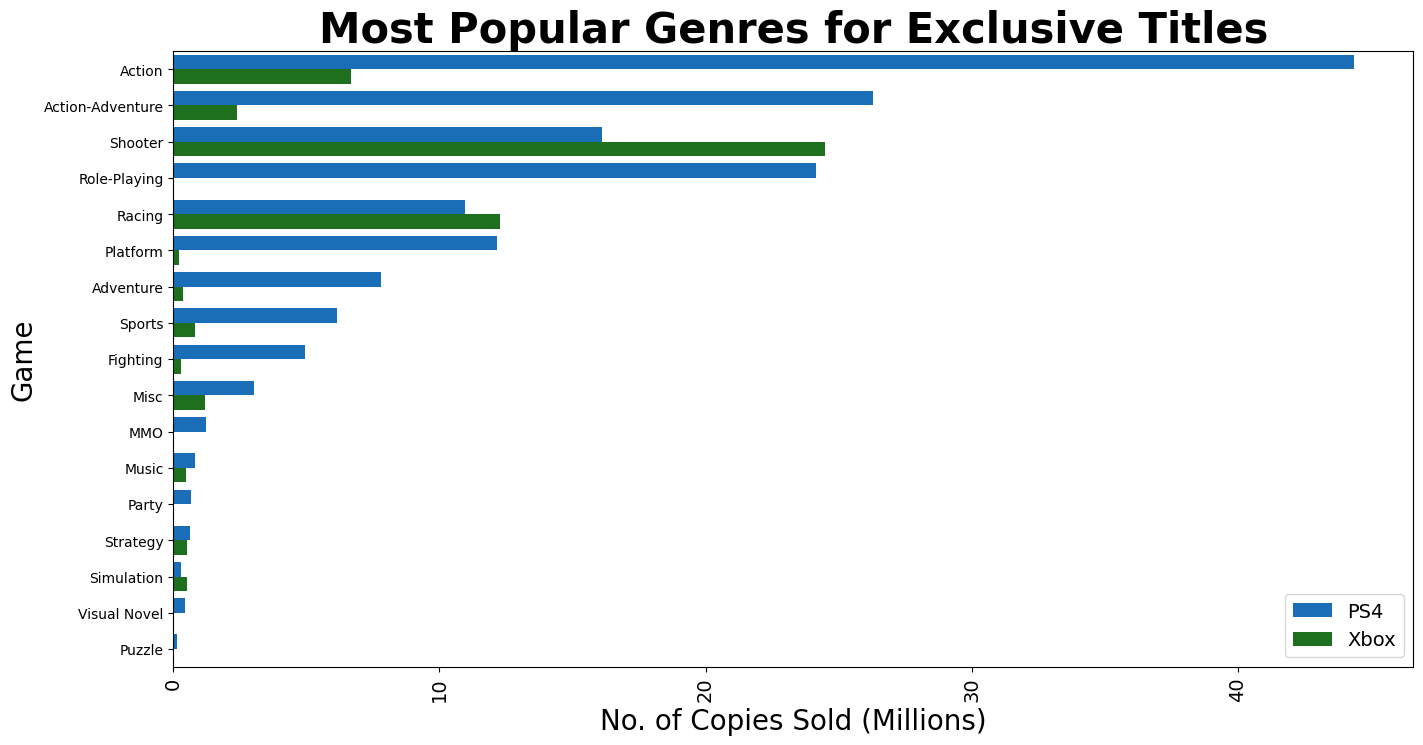

In [31]:
ax = sns.barplot(data = genre_exclusive, y = 'Genre', x = 'Global', hue = 'Console', palette = ['#0070D1','#107C10'])
ax.figure.set_size_inches(16, 8)

ax.set_title("Most Popular Genres for Exclusive Titles", fontweight="bold", fontsize = 30)
ax.set_xlabel('No. of Copies Sold (Millions)', fontsize = 20)
ax.set_ylabel('Game', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.legend(fontsize = 14, loc='lower right')

plt.show()

# Analysis on Popularity of Different Genres from 2013-2018

In [ ]:
ax = sns.barplot(data = all_games.groupby("Year").sum().head(6).reset_index(), x = 'Year', y = 'Global', color='#FFBF00')

ax.figure.set_size_inches(12, 8)
ax.set_title('Total PS4 and XBox One Game Copies Sold per Year', fontweight="bold", fontsize=30)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('No. of Copies Sold (Millions)', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
genre_total = all_games.groupby(['Genre']).sum().sort_values('Global', ascending=False)
genre_more_than_20_global = genre_total.query('Global > 20')
genre_more_than_20_global = genre_more_than_20_global.index.tolist()

In [ ]:
most_played_genres = pd.DataFrame()

for genre in genre_more_than_20_global:
  temp = all_games.query('Genre in "%s"' % genre)
  most_played_genres = pd.concat([most_played_genres, temp])

most_played_genres['Genre'].unique()

In [ ]:
ax = sns.barplot(x = genre_total.index, y = genre_total['Global'], palette = 'bright')
ax.figure.set_size_inches(14, 8)

ax.set_title("Most to Least Popular Genres", fontweight="bold", fontsize = 28)
ax.set_ylabel('No. of Copies Sold (Millions)', fontsize = 18)
ax.set_xlabel('Genre', fontsize = 18)
plt.xticks(rotation=45, fontsize=12)

plt.show()

In [ ]:
ax = sns.lineplot(x = 'Year', y = 'Global', hue = 'Genre', data = most_played_genres.reset_index(), err_style=None, palette='bright')
ax.figure.set_size_inches(20, 8)
ax.set_title('Genre Popularity Over the Years', fontweight="bold", fontsize=24)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('No. of Copies Sold (Millions)', fontsize=18)
plt.legend(loc = 'upper right', fontsize = 12)
plt.show()

In [46]:
# Take off Years 2019 and 2020
years = all_games.Year.dropna().unique()[:-2]

In [47]:
games_per_year = pd.DataFrame()

for year in years:
  game_year = pd.DataFrame(all_games.drop_duplicates('Game').reset_index().sort_values('Global', ascending = False) \
                          .query('Year == %d' % int(year)).iloc[:3][['Game', 'Year', 'Global', 'Genre']])
  games_per_year = pd.concat([games_per_year, game_year])

games_per_year = games_per_year.sort_values('Year')

In [ ]:
games_per_year.query('Year == 2018')

In [ ]:
ax = sns.barplot(data = games_per_year, y = 'Game', x = 'Global', hue = 'Year', dodge=False, palette = 'tab10')
ax.figure.set_size_inches(20, 10)

ax.set_title('Highest-Selling Titles per Year', fontweight="bold", fontsize=24)
ax.set_ylabel('Game', fontsize=20)
ax.set_xlabel('No. of Copies Sold (Millions)', fontsize=20)
plt.legend(loc = 'lower right', fontsize = 14)
plt.yticks(fontsize = 12)

plt.show()

# Analysis on Location-Based Performance of Games

In [ ]:
region = [all_games['North America'].sum(), all_games.Europe.sum(), all_games.Japan.sum(), all_games['Rest of World'].sum()]
labels = ['North America', 'Europe', 'Japan', 'Rest of World']
colours = ['#00FF00', '#00FFFF', '#FF0000', '#FFBF00']
explode = [0.05, 0.05, 0.05, 0.05]

plt.rc('figure', figsize = (8, 8))
fig, ax = plt.subplots()
ax.pie(region, labels = labels, autopct = '%.1f%%', colors = colours, explode = explode, textprops=dict(color="k", fontsize=14), pctdistance=0.80)
ax.set_title('Proportion of Games Sold Per Region', fontweight="bold", fontsize=20)

centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()
ax.add_artist(centre_circle)

ax.axis('equal')

plt.show()

In [ ]:
plt.rc('figure', figsize = (16, 12))
fig, ax = plt.subplots(2, 3)

for i in range(6):
  axis_index = [0 if i < 3 else 1, i if i < 3 else i % 3]

  game_data = list(all_games.iloc[i][4:8])
  index_biggest_value_game_data = np.argmax(game_data)
  local_explode = [0, 0, 0, 0]
  local_explode[index_biggest_value_game_data] += 0.1

  ax[axis_index[0], axis_index[1]].pie(game_data, autopct = '%.1f%%', colors = colors, explode = local_explode,
                                       textprops=dict(color="k", fontsize=12), shadow = True)

  ax[axis_index[0], axis_index[1]].set_title("%s" % all_games.iloc[i][0], fontsize=14)

fig.legend(labels, fontsize = 12, loc = 'center right')
plt.suptitle('Distribution of Sales of Popular Titles per Region', fontweight="bold", fontsize = 24)
plt.show()